# Chemical Analysis

This last one I wanted to make extra special. The last couple of projects have specifically showcased a scenario that we covered. For this one, I want to show you how to create a project with the concepts that you have learned. <br>
 I am a chemist by trade, so I decided to create a novel dataset for this project by pulling data from [ChEMBL](https://www.ebi.ac.uk/chembl/), a great resource for bioactive molecules with drug-like properties. <br>

The goal in this project is to cluster a set of chemical compounds that are used for therapeutic usage. This clustering is useful because instead of doing months and months of lab analysis, we could focus on similarly grouped compounds to the compound we are studying as a therapeutic drug. 

## Get Data

Here are the filters I used:
1. Type = 'Small Molecules'
2. Withdrawn = False 

Here's the full query.
```
curl -XPOST "https://www.ebi.ac.uk/chembl/elk/es/chembl_molecule/_search" -H 'Content-Type: application/json' -d'{
  "size": 20,
  "from": 0,
  "_source": [
    "molecule_chembl_id",
    "pref_name",
    "molecule_synonyms",
    "molecule_type",
    "max_phase",
    "molecule_properties.full_mwt",
    "_metadata.related_targets.count",
    "_metadata.related_activities.count",
    "molecule_properties.alogp",
    "molecule_properties.psa",
    "molecule_properties.hba",
    "molecule_properties.hbd",
    "molecule_properties.num_ro5_violations",
    "molecule_properties.rtb",
    "molecule_properties.ro3_pass",
    "molecule_properties.qed_weighted",
    "molecule_properties.cx_most_apka",
    "molecule_properties.cx_most_bpka",
    "molecule_properties.cx_logp",
    "molecule_properties.cx_logd",
    "molecule_properties.aromatic_rings",
    "structure_type",
    "inorganic_flag",
    "molecule_properties.heavy_atoms",
    "molecule_properties.hba_lipinski",
    "molecule_properties.hbd_lipinski",
    "molecule_properties.num_lipinski_ro5_violations",
    "molecule_properties.mw_monoisotopic",
    "molecule_properties.molecular_species",
    "molecule_properties.full_molformula",
    "molecule_structures.canonical_smiles",
    "molecule_structures.standard_inchi_key",
    "natural_product",
    "polymer_flag"
  ],
  "query": {
    "bool": {
      "must": {
        "bool": {
          "boost": 1,
          "must": {
            "bool": {
              "must": [],
              "should": []
            }
          }
        }
      },
      "filter": [
        [
          {
            "bool": {
              "should": [
                {
                  "term": {
                    "molecule_type": "Small molecule"
                  }
                }
              ]
            }
          },
          {
            "bool": {
              "should": [
                {
                  "range": {
                    "molecule_properties.num_ro5_violations": {
                      "gte": 0,
                      "lt": 1
                    }
                  }
                }
              ]
            }
          },
          {
            "bool": {
              "should": [
                {
                  "term": {
                    "withdrawn_flag": false
                  }
                }
              ]
            }
          }
        ]
      ]
    }
  },
  "track_total_hits": true,
  "sort": []
}'
```

When you pull your own dataset, here is a script that I used to clean the data. 

```
cols = ["ChEMBL ID","Name","Synonyms","Type","Max Phase","Molecular Weight","Targets","Bioactivities","AlogP","Polar Surface Area","HBA","HBD","#RO5 Violations","#Rotatable Bonds","Passes Ro3","QED Weighted","CX Acidic pKa","CX Basic pKa","CX LogP","CX LogD","Aromatic Rings","Structure Type","Inorganic Flag","Heavy Atoms","HBA (Lipinski)","HBD (Lipinski)","#RO5 Violations (Lipinski)","Molecular Weight (Monoisotopic)","Molecular Species","Molecular Formula","Smiles","Inchi Key"]

import pandas as pd

#the data has an excess number of quotes
df = pd.read_csv(<whatever your file name is>,skiprows=1,header=None,delimiter=';"',names=cols)

#Need to clean the excess quotes
for col in df.columns:
  df[col] = df[col].str.replace('"', '')

df.to_csv('chemistry-clean.csv',index=False)
```


I only pulled 100K rows because the entire set was too much for my computer as you have to download the file from the website. 

In [2]:
import pandas as pd
df = pd.read_csv('chemistry-subset-clean.csv')

/var/folders/cj/hrhd1p993b156lcvtr84zr8h0000gn/T/ipykernel_24526/1905440285.py:2: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('chemistry-subset-clean.csv')


In [3]:
df.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL539070,NaN,NaN,Small molecule,0,286.79,1.0,1.0,2.28,73.06,...,-1,17,5,3,0,250.0888,NEUTRAL,C11H15ClN4OS,CCCOc1ccccc1-c1nnc(NN)s1.Cl,"WPEWNRKLKLNLSO-UHFFFAOYSA-N,,,,,,,,,,,,,,,"
1,CHEMBL2419030,NaN,NaN,Small molecule,0,359.33,4.0,4.0,3.94,85.13,...,-1,24,6,1,0,359.0551,NEUTRAL,C14H12F3N3O3S,O=c1nc(NC2CCCC2)sc2c([N+](=O)[O-])cc(C(F)(F)F)...,"QGDMYSDFCXOKML-UHFFFAOYSA-N,,,,,,,,,,,,,,,"
2,CHEMBL3465961,NaN,NaN,Small molecule,0,319.42,16.0,22.0,2.22,50.50,...,-1,23,4,1,0,319.2060,BASE,C18H26FN3O,CC(O)CN1CCC(CN(C)Cc2cc(C#N)ccc2F)CC1,"FZEVYCHTADTXPM-UHFFFAOYSA-N,,,,,,,,,,,,,,,"
3,CHEMBL194112,NaN,NaN,Small molecule,0,366.38,2.0,3.0,4.80,57.53,...,-1,26,3,2,0,366.1443,NEUTRAL,C20H21F3O3,C[C@]12CCC3c4ccc(O)cc4CCC3C1CC(C(=O)C(F)(F)F)=C2O,"FIBOSLUEJGPVMK-RYCRIANLSA-N,,,,,,,,,,,,,,,"
4,CHEMBL2047226,NaN,NaN,Small molecule,0,452.40,4.0,8.0,4.93,53.08,...,-1,29,5,2,0,451.1372,NEUTRAL,C23H26BrN5,Brc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1,"WOAVNWHCIXCOIZ-UHFFFAOYSA-N,,,,,,,,,,,,,,,"


In [21]:
df.columns

Index(['ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Max Phase',
       'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations',
       '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
       'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Structure Type', 'Inorganic Flag', 'Heavy Atoms', 'HBA (Lipinski)',
       'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Molecular Species',
       'Molecular Formula', 'Smiles', 'Inchi Key'],
      dtype='object')

In [22]:
filtered_df = df[['Molecular Weight','Targets','Bioactivities','Polar Surface Area','HBA', 'HBD','Aromatic Rings', 'Inorganic Flag', 'Heavy Atoms',
'#Rotatable Bonds']]

In [23]:
filtered_df.describe()

,Molecular Weight,Targets,Bioactivities,Polar Surface Area,HBA,HBD,Aromatic Rings,Inorganic Flag,Heavy Atoms,#Rotatable Bonds
count,99999.000000,97957.000000,97957.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,352.628512,9.939606,15.567718,73.260337,4.765718,1.353534,2.211582,-0.991960,24.539665,4.647526
std,78.478559,20.706386,81.849269,30.033999,1.821115,1.102102,1.048502,0.089306,5.540197,2.489056
min,27.030000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,298.430000,2.000000,3.000000,52.310000,3.000000,1.000000,2.000000,-1.000000,21.000000,3.000000
50%,353.340000,4.000000,6.000000,71.110000,5.000000,1.000000,2.000000,-1.000000,25.000000,4.000000
75%,410.385000,10.000000,14.000000,91.840000,6.000000,2.000000,3.000000,-1.000000,29.000000,6.000000
max,927.020000,1078.000000,7272.000000,294.420000,10.000000,5.000000,7.000000,0.000000,37.000000,24.000000


In [24]:
filtered_df.nunique()

Molecular Weight      17214
Targets                 275
Bioactivities           481
Polar Surface Area     9784
HBA                      11
HBD                       6
Aromatic Rings            8
Inorganic Flag            2
Heavy Atoms              37
#Rotatable Bonds         25
dtype: int64

Before we go any further, let me explain to you what the columns mean. 

**Molecular Weight** - molecular weight of the parent form of the moleculie <br>
**Targets** - the biochemical entity to which the drug first binds in the body to elicit its effect <br>
**Bioactivities** - reactivity with biological matter<br>
**Polar Surface Area** - defined as the surface sum over all polar atoms or molecules including their attached hydrogen atoms;commonly used medicinal chemistry metric for the optimization of a drug's ability to permeate cells<br>
**HBA** - count of the number of Hydrogen Bond Acceptors <br>
**HBD** - count of the number of Hydrogen Bond Donors <br>
**Aromatic Rings** - the number of aromatic rings in the molecule <br>
**Inorganic Flag** - whether an inorganic compound is in the moecule <br>
**Heavy_Atoms** - the number of non-hydrogen atoms in the molecule <br>
**Rotatable Bonds** - how many bonds can be rotated

## Exploratory Data Analysis (EDA)

We have not talked about exploratory data analysis (EDA) just yet, so our first task is to define it:

EDA is a process of examining data sets to see what they can tell us. It is not a formal statistical technique, but rather a set of heuristics for understanding the data and what it might mean. EDA is often used in the early stages of an investigation or research project to get an idea about the data, identify patterns and outliers, and develop hypotheses about relationships between variables.

The goal of EDA is to provide new insights into the dataset that would not be possible from just looking at summary statistics or plots of the data.

In [25]:
filtered_df.isnull().sum()

Molecular Weight         0
Targets               2042
Bioactivities         2042
Polar Surface Area       0
HBA                      0
HBD                      0
Aromatic Rings           0
Inorganic Flag           0
Heavy Atoms              0
#Rotatable Bonds         0
dtype: int64

<AxesSubplot:>

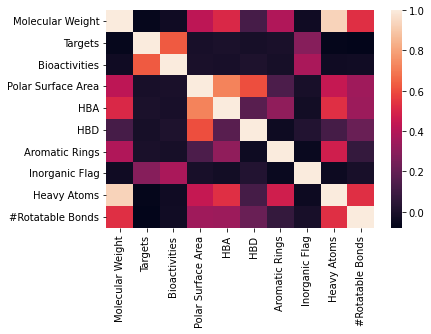

In [26]:
import seaborn as sns
corr = filtered_df.corr()
sns.heatmap(corr)

Some of these correlations make sense. 
High molecular weight would correspond with:
1. Heavy Atoms 
2. Number of rotatable bonds (you will have more bonds to rotate)
3. Large polar surface area 

One thing we need make sure of before we can use k-means is whether our features adheres to the normal distribution. 

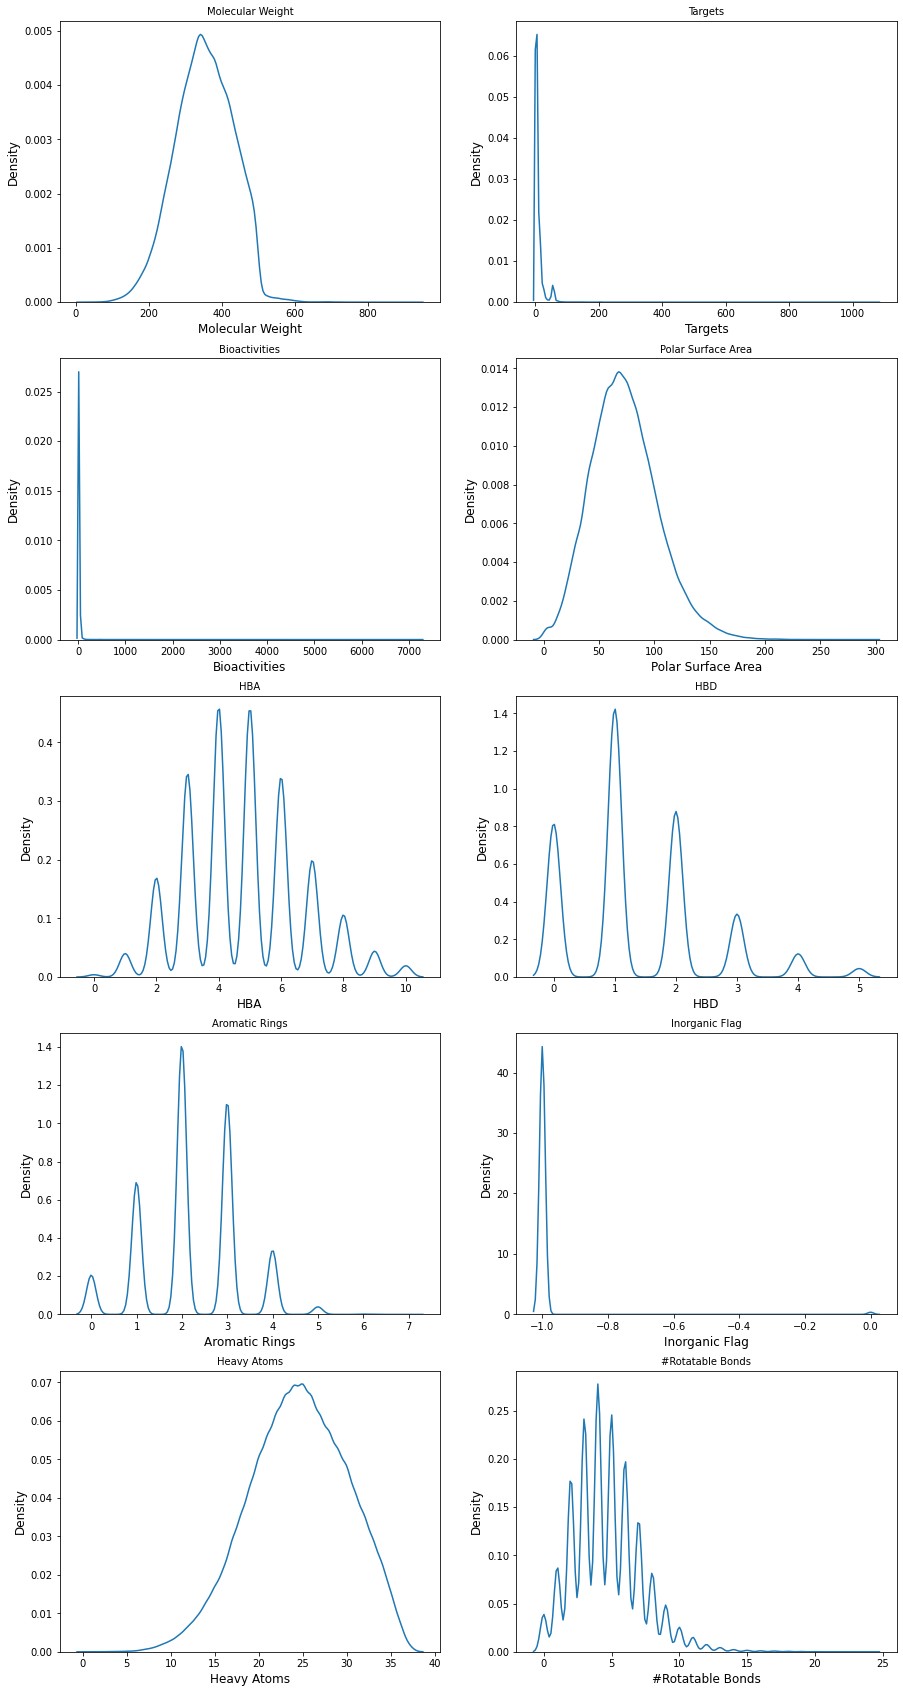

In [47]:
import matplotlib.pyplot as plt

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, axes = plt.subplots(nrows = 5, ncols = 2,figsize=(15,30))    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9

for ax, col in zip(axes, filtered_df.columns):
  sns.kdeplot(data=filtered_df, x=col,ax = ax).set(title=col)


Most of the graphs do comply by the normal distribution. Unfortunately, the HBA, HBD, aromatic rings, inorganic flag, and rotatable bonds are all discrete values, which will not do well with k-means clustering. 

In [50]:
filtered_df = filtered_df[['Molecular Weight','Targets','Bioactivities','Polar Surface Area','Heavy Atoms']]

## Feature engineering

Feature engineering is *very* project specific, so it is hard to generalize. However, here are some things that I can suggest: <br><br>
1. dates - are there trends among years, months, days of the month? Seasonality?
2. aggregates - are you looking at items bought? is there a trend among when they buy goods? 

This particular project does not have a whole lot to feature engineer. We have characteristics of small compounds in our dataset, so there is
not much else we could extract. 

In [51]:
filtered_df.dtypes

Molecular Weight      float64
Targets               float64
Bioactivities         float64
Polar Surface Area    float64
Heavy Atoms             int64
dtype: object

Before we can do kmeans, we need to remove all of the null values. This is a standard procedure for most machine learning methods. 

In [56]:
filtered_df.dropna(inplace=True)

/var/folders/cj/hrhd1p993b156lcvtr84zr8h0000gn/T/ipykernel_24526/724713040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(inplace=True)


In [57]:
filtered_df.isna().sum()

Molecular Weight      0
Targets               0
Bioactivities         0
Polar Surface Area    0
Heavy Atoms           0
dtype: int64

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(filtered_df)
df_normalized = scaler.transform(filtered_df)


## Clustering

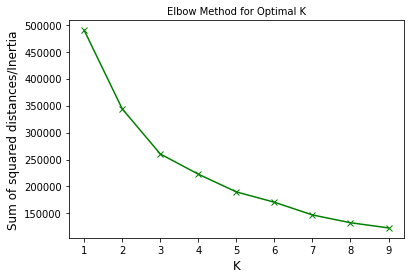

In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,10,1)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_normalized)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'gx-')
plt.xlabel('K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method for Optimal K')
plt.show()
  

From this graph, I would choose k=3. Let's take a look at what Silhouette Score produces.

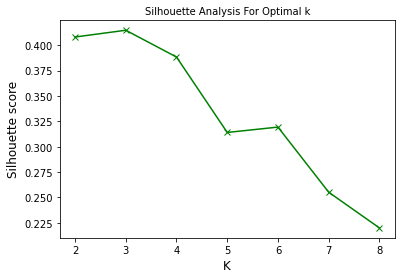

In [60]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_normalized)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(filtered_df, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'gx-')
plt.xlabel('K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis For Optimal k')
plt.show()

To get the optimal k value, we will need the highest Silhouette Score. According to this graph, it will be at k = 3. Both the elbow and Silhouette Score both get the same K, which is ideal. 

In [61]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(df_normalized)

In [63]:
filtered_df['cluster_labels'] = labels

/var/folders/cj/hrhd1p993b156lcvtr84zr8h0000gn/T/ipykernel_24526/2041583613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster_labels'] = labels


In [64]:
filtered_df.groupby('cluster_labels').median()

,Molecular Weight,Targets,Bioactivities,Polar Surface Area,Heavy Atoms
cluster_labels,,,,,
0,300.310,5.0,7.0,55.98,21.0
1,410.430,4.0,6.0,87.14,29.0
2,328.275,274.0,1534.5,74.71,23.5


It looks like the cluster differs in targets, bioactivities, and then the Inorganic Flag. 

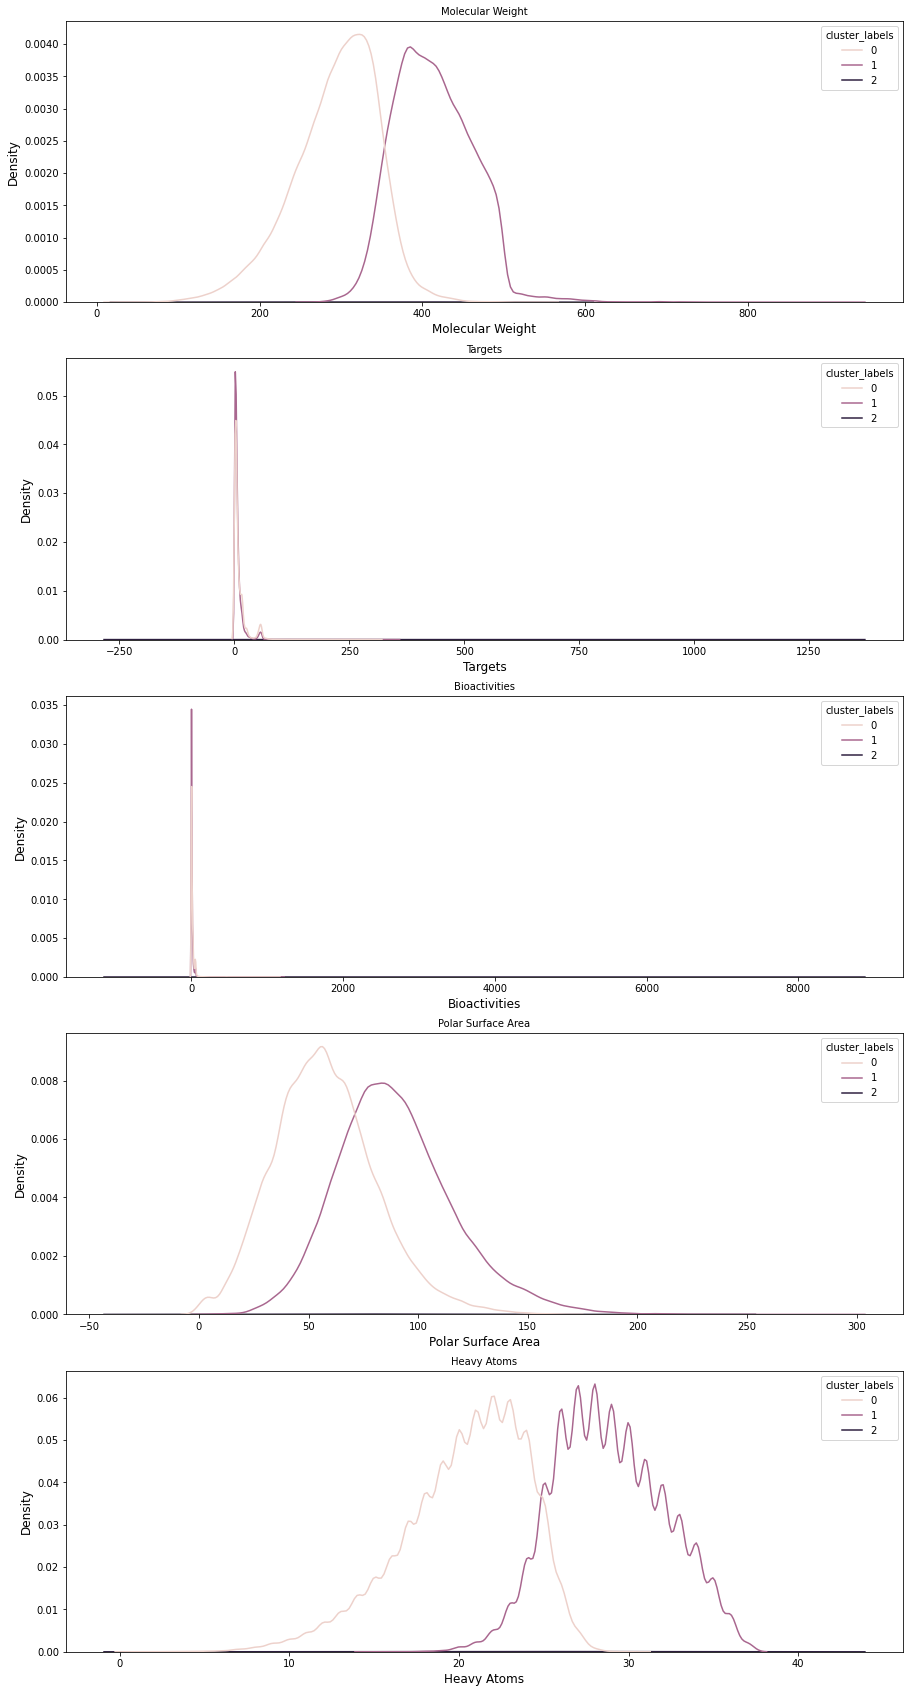

In [77]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize=(15,30))    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9

for ax, col in zip(axes, filtered_df.columns):
  sns.kdeplot(data=filtered_df, x=col, hue='cluster_labels',ax = ax).set(title=col)

We can't see the third values. Odd. 

In [73]:
filtered_df['cluster_labels'].value_counts()

0    49627
1    48228
2      102
Name: cluster_labels, dtype: int64

Ohhh so that's why we couldn't see the third cluster. There are so few of them. Let's take a look at them individually then. 

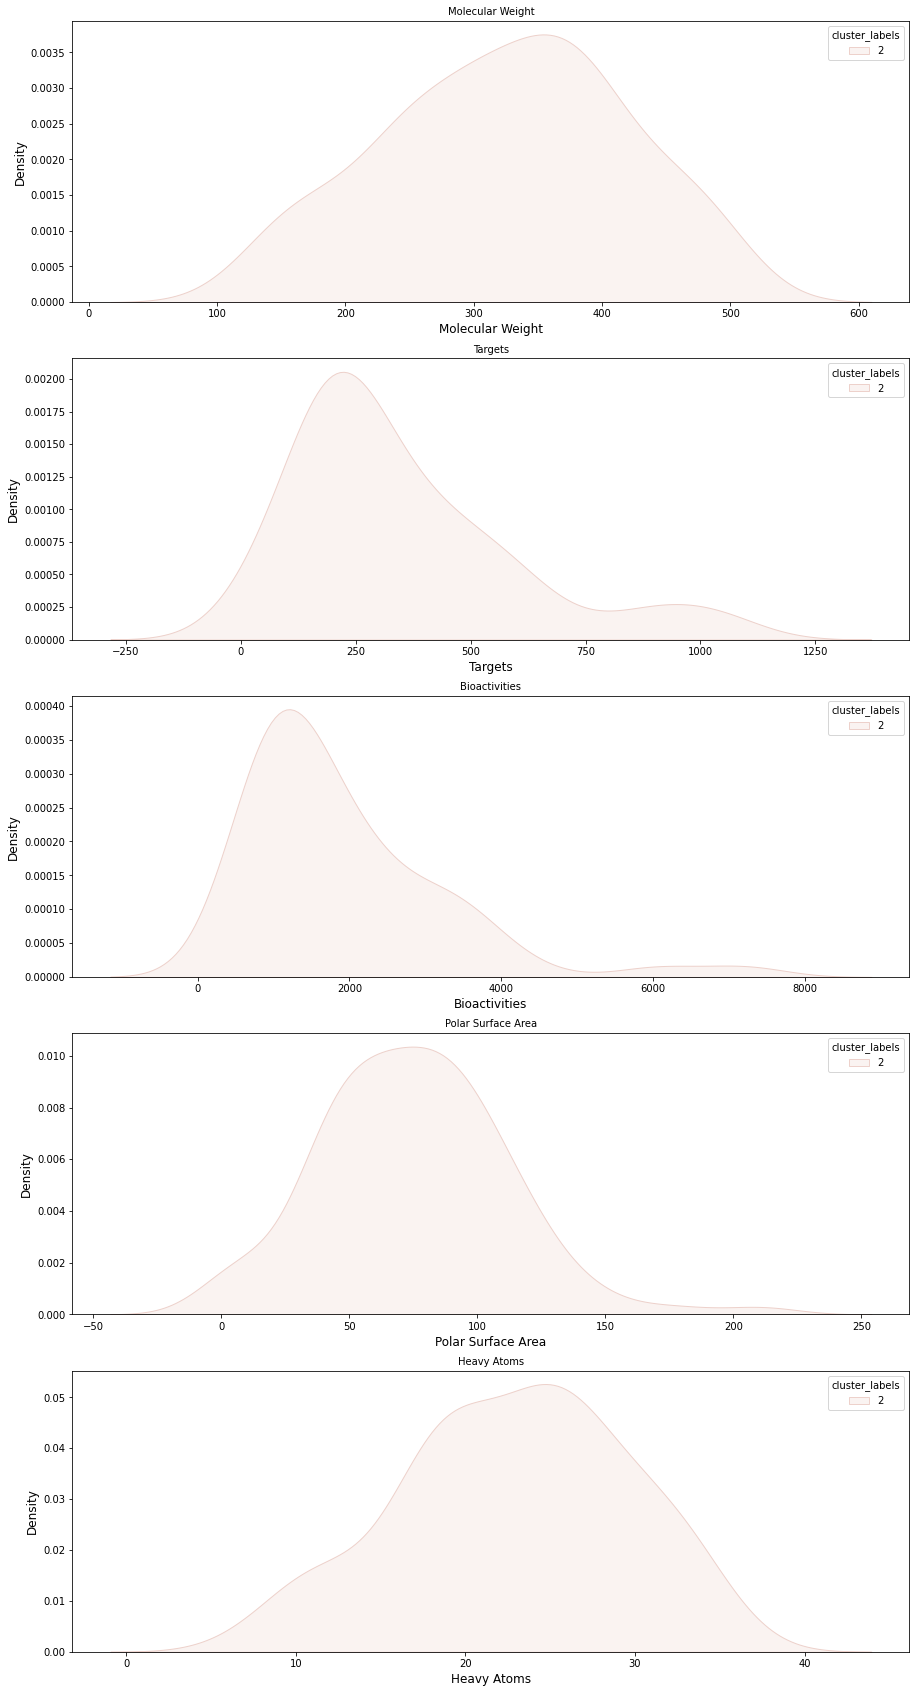

In [76]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 5, ncols = 1,figsize=(15,30))    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9

for ax, col in zip(axes,filtered_df.columns):
  sns.kdeplot(data=filtered_df[filtered_df['cluster_labels']==2], x=col, hue='cluster_labels', fill=True,ax = ax).set(title=col)

## Conclusions

Here, I usually write out my conclusions. I know it seems like you are repeating yourself, but most people are not necessarily interested in all of your work just the conclusions that you can pull from it. 


* clustering shows that we should look further into the molecular weight, polar surface area, and the number of heavy atoms.

## Further Studies

This project is only part of research, so what could we do next time to get more results? That's what we write in this section. 

1. We only looked at small compounds here, so adding a different(or just more) variety of compounds. 
2. In this experiment, we used 100k small compounds out of the 1.3M that we have. I wonder if adding more molecules would notice the same trends.

Anything else you would recommend? Let me know in the comments! 

**References**

Banerji, Ankita. “K-Mean: K Means Clustering: Methods to Find the Best Value of k.” Analytics Vidhya, Analytics Vidhya, 19 July 2022, https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/. 

Davies M, Nowotka M, Papadatos G, Dedman N, Gaulton A, Atkinson F, Bellis L, Overington JP. (2015) 'ChEMBL web services: streamlining access to drug discovery data and utilities.' Nucleic Acids Res., 43(W1) W612-W620.

Gaulton A, Hersey A, Nowotka M, Bento AP, Chambers J, Mendez D, Mutowo P, Atkinson F, Bellis LJ, Cibrián-Uhalte E, Davies M, Dedman N, Karlsson A, Magariños MP, Overington JP, Papadatos G, Smit I, Leach AR. (2017) 'The ChEMBL database in 2017.' Nucleic Acids Res., 45(D1) D945-D954.